<a href="https://colab.research.google.com/github/prasath1196/Deep-Learning-AI-Mini-Projects/blob/main/Handwriting_Recognition_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8887 - loss: 0.3810
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9716 - loss: 0.0954
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9816 - loss: 0.0609
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9872 - loss: 0.0417
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9899 - loss: 0.0313
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9740 - loss: 0.0880
Test Accuracy: 97.80%


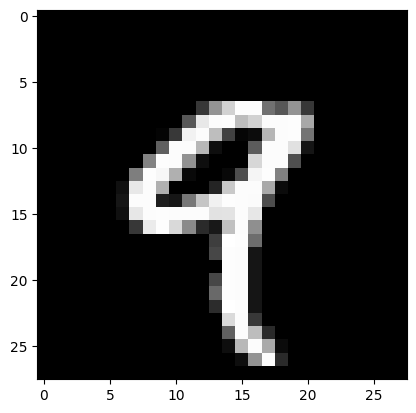

In [ ]:
import tensorflow as  tf
from tensorflow.keras import  layers, models
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


plt.imshow(x_train[4], cmap='gray')

# Scaling the values within 0 and 1
x_train, x_test = x_train / 255.0, x_test /255.0


model = models.Sequential([
    layers.Flatten(input_shape=[28,28]),
    layers.Dense(256, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

model.compile(optimizer = "adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
              )

model.fit(x_train, y_train, epochs=5)


test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')






In [ ]:
predictions = model.predict(x_test)
print(predictions)
print('Predictions Shape = ', predictions.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[3.26084715e-10 5.26144350e-10 2.98507501e-07 ... 9.99991000e-01
  5.88077320e-09 3.45167649e-07]
 [3.88095334e-09 1.19576216e-04 9.99876499e-01 ... 2.68311903e-13
  3.56359493e-07 1.72037284e-13]
 [3.09632270e-07 9.95940089e-01 1.22980529e-03 ... 1.31378858e-03
  1.40109914e-03 1.02538564e-07]
 ...
 [1.13918884e-13 2.82482475e-11 1.26555615e-11 ... 9.21448827e-06
  6.99736574e-07 1.79070063e-04]
 [9.31112965e-11 1.14854686e-12 2.15849189e-13 ... 1.44544533e-11
  3.96632061e-07 2.50908777e-12]
 [1.80388027e-09 5.02515174e-12 1.34988160e-10 ... 4.26436699e-16
  2.10592897e-11 7.77251943e-11]]
Predictions Shape =  (10000, 10)


In [ ]:
predictions[0]

array([3.2608471e-10, 5.2614435e-10, 2.9850750e-07, 8.2706983e-06,
       5.8719034e-14, 3.6453660e-09, 5.0441660e-13, 9.9999100e-01,
       5.8807732e-09, 3.4516765e-07], dtype=float32)

7


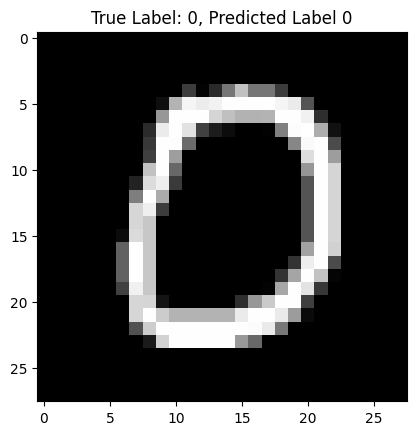

In [ ]:
print(np.argmax(predictions[0]))
plt.imshow(x_test[10], cmap='gray')
plt.title(f"True Label: {y_test[10]}, Predicted Label {np.argmax(predictions[10])}")
plt.show()

In [ ]:
plt.plot(history['loss']), label ='Training Loss'